# Distribution of some values in collected data

In [6]:
%matplotlib inline
import thinkplot
import readData
import statFunctions
import numpy as np

In [7]:
preg = readData.ReadFemPreg()
live = preg[preg.outcome == 1]
live.totalwgt_kg.mean()

3.295637550971785

#### Weight distribution for live births

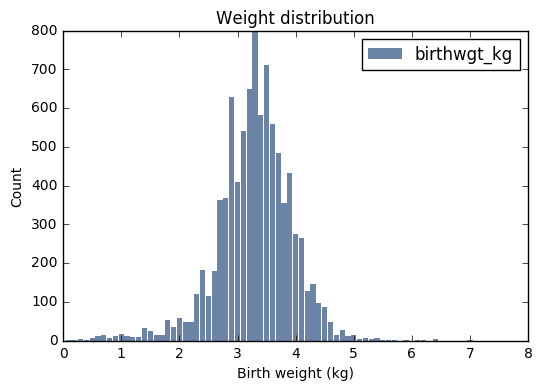

In [26]:
# Load just live birth pregnancies
preg = readData.ReadFemPreg()
live = preg[preg.outcome == 1]
# Weight distribution for live births
hist = statFunctions.Hist(round(live.totalwgt_kg, 1), label='birthwgt_kg')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Birth weight (kg)', ylabel='Count', title='Weight distribution')

#### Age distribution for all births

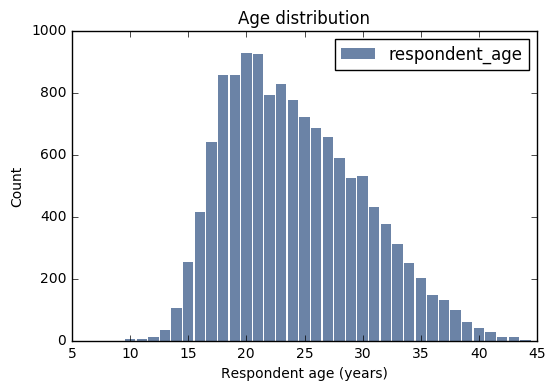

In [27]:
ages = np.floor(preg.agepreg)
hist = statFunctions.Hist(ages, label="respondent_age")
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Respondent age (years)', ylabel='Count', title ='Age distribution')

#### Pregnancies length distribution

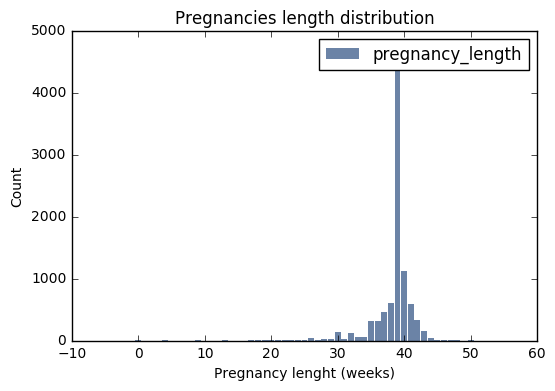

In [28]:
hist = statFunctions.Hist(live.prglngth, label='pregnancy_length')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Pregnancy lenght (weeks)', ylabel='Count', title="Pregnancies length distribution")

#### Pregnancy length of first and non first babies
Ploted on the same plot

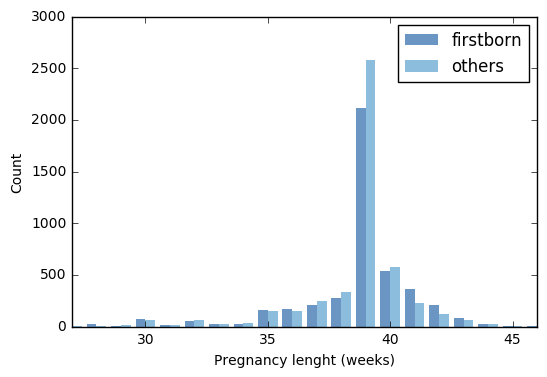

In [29]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_hist = statFunctions.Hist(firsts.prglngth, label='firstborn')
other_hist = statFunctions.Hist(others.prglngth, label='others')

width = 0.4
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='Pregnancy lenght (weeks)', ylabel='Count', xlim=[27, 46])

##### Difference between pregnancies length first and non first pregnancies (with 'live' outcome)

In [30]:
meanFirsts = firsts.prglngth.mean()
meanOthers = others.prglngth.mean()
print(meanFirsts)
print(meanOthers)

print(statFunctions.CohenEffectSize(firsts.prglngth, others.prglngth))

38.60095173351461
38.52291446673706
0.028879044654449883


####  Probability Mass Function (PMF)

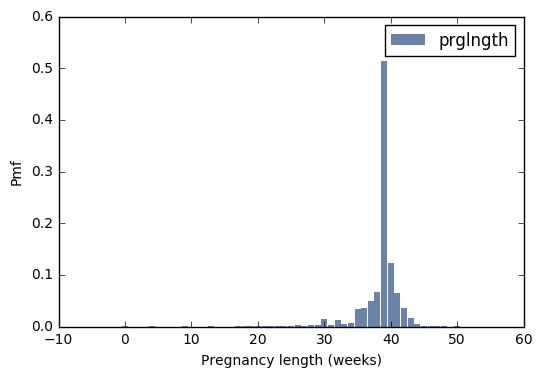

In [31]:
pmf = statFunctions.Pmf(live.prglngth, label='prglngth')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')
thinkplot.Show()

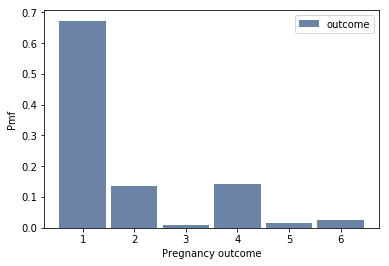

In [7]:
df = readData.ReadFemPreg()
df['live_outcome'] = (df.outcome == 1).astype(int)
pmf = statFunctions.Pmf(df.outcome, label='outcome')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy outcome', ylabel='Pmf')
thinkplot.Show()

#### PMF in step function

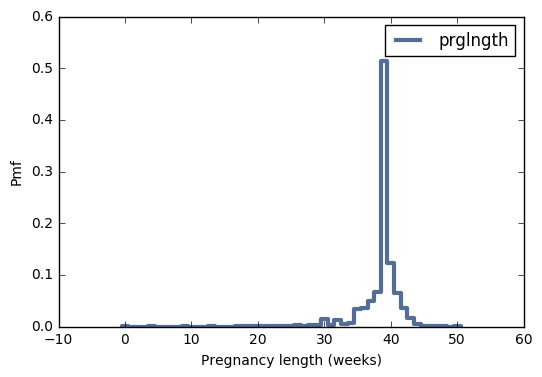

In [38]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

#### PMF difference for first and non first born pregnancies

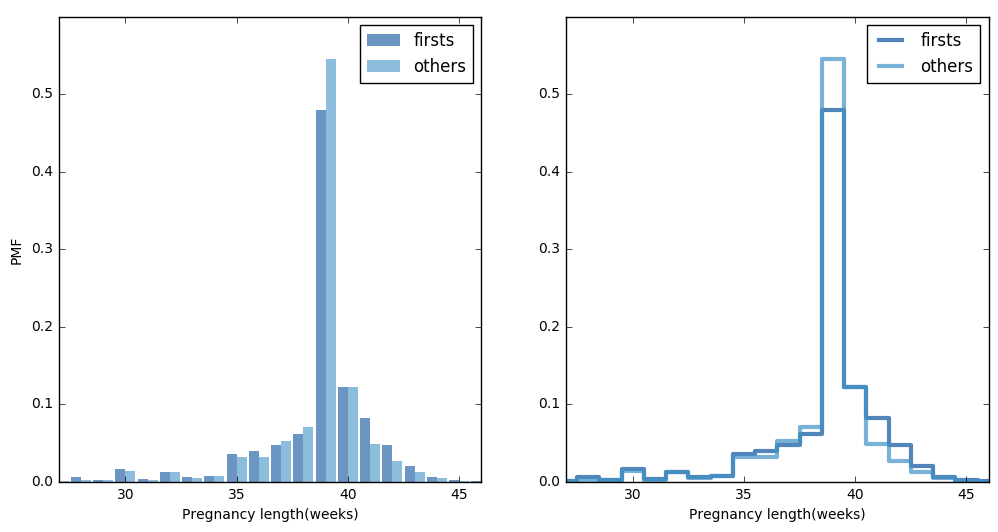

In [37]:
first_pmf = statFunctions.Pmf(firsts.prglngth, label='firsts')
other_pmf = statFunctions.Pmf(others.prglngth, label='others')
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

### Are first babies more likely to be late?

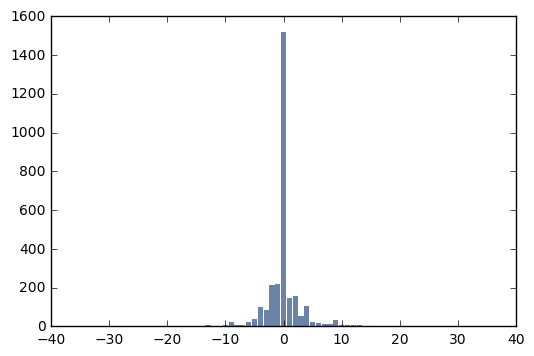

In [40]:
preg_map = readData.MakePregMap(live)

hist = statFunctions.Hist()

for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1
        
thinkplot.Hist(hist)

In [41]:
pmf = statFunctions.Pmf(hist)
pmf.Mean()

-0.056367432150313312

### Cumulitive distribution functions

Comparing cdfs of first or non first born pregnancies lenghts

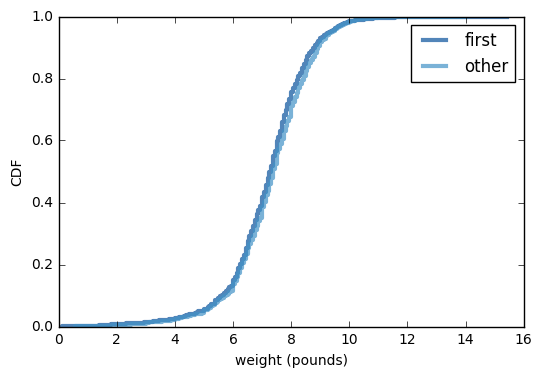

In [47]:
first_cdf = statFunctions.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = statFunctions.Cdf(others.totalwgt_lb, label='other')
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF')